<a href="https://colab.research.google.com/github/tasnimislamraisa/Python_Learning/blob/main/MLP_for_image_classification_Lab_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Loading the dataset**

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# image size 28*28
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [4]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [5]:
# check how many levels
unique,count = np.unique(y_train,return_counts=True)
dict(zip(unique,count))

{0: 5000,
 1: 5000,
 2: 5000,
 3: 5000,
 4: 5000,
 5: 5000,
 6: 5000,
 7: 5000,
 8: 5000,
 9: 5000}

**Dataset samples**

In [6]:
index=[10,16,1888,2000,20005]
images = x_train[index]
labels = y_train[index]

**Plottinf image sample**

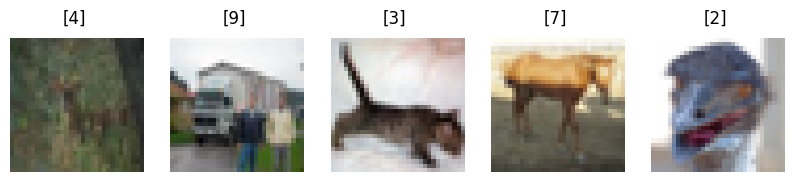

In [7]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i],cmap='gray')
   # plt.title(labels[i],fontsize=12)
    plt.text(12,-4,labels[i],fontsize=12)
    plt.axis('off')

In [ ]:
'''input_size=x_train.shape[1]*x_train.shape[1]
print(input_size)
x_train= np.reshape(x_train,[-1,input_size])
x_train.shape
input_size=x_test.shape[1]*x_test.shape[1]
print(input_size)
x_test= np.reshape(x_test,[-1,input_size])
x_test.shape'''

'input_size=x_train.shape[1]*x_train.shape[1]\nprint(input_size)\nx_train= np.reshape(x_train,[-1,input_size])\nx_train.shape\ninput_size=x_test.shape[1]*x_test.shape[1]\nprint(input_size)\nx_test= np.reshape(x_test,[-1,input_size])\nx_test.shape'

In [8]:
x_train=x_train/255.0
x_test=x_test/255.0

In [56]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

# **one hot encoding**

In [ ]:
# one hot encoding
# if we use catagorical entropy loss function we have to use one hot encoding
# but as i used "sparse_categorical_crossentropy" i didn't apply one hot encoding
#y_train=to_categorical(y_train)
#y_test=to_categorical(y_test)
#y_train[:2]


In [26]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
# if we have more than one output layer then we use softmax activation function
model.add(Dense(10,activation='softmax'))

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,647,946 (6.29 MB)

 Trainable params: 1,647,946 (6.29 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [36]:
history = model.fit(x_train,y_train,epochs=100,batch_size=16,callbacks=[callback])


Epoch 1/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4977 - loss: 1.4047
Epoch 2/100


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5011 - loss: 1.3888
Epoch 3/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5053 - loss: 1.3728
Epoch 4/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5157 - loss: 1.3532
Epoch 5/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5129 - loss: 1.3597
Epoch 6/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.5217 - loss: 1.3345
Epoch 7/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5205 - loss: 1.3338
Epoch 8/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5229 - loss: 1.3236
Epoch 9/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.5269 - loss: 1.3103
Epoch 10/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.5305 - loss: 1.2999
Epoch 11/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.5326 - loss: 1.3026
Epoch 12/100
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5347 - loss: 1.2972
Epoch 13/100
3125/3125 ━━━

In [43]:
y_prob = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [44]:
y_pred = y_prob.argmax(axis=1)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4803